<h1>Bank Marketing Dataset (bank-additional-full)</h1>

<b>Topic</b>: Direct marketing campaigns of a bank to make clients subscribe a bank term deposit.<br>

DATASET: bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math 
import time
import seaborn as sns
import datetime

from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_scores
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [16]:
bankdf = pd.read_csv("datasets/bank-additional-full.csv", sep=";")
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h1>DESCRIPTION OF DATASET, CORRELATION MATRIX, PAIRPLOT and DESCRIPTION OF CATEGORICAL VARS</h1>

1) Describe() is used to provide descriptive statistics of the numerical variables in the dataset<br>
2) Correlation Heatmap: correlation of the numerical variables. Orange means positive correlation, Blue means negative correlation.<br>
3) Categorical Variables Description

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [17]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
bankdf.describe()  # statistics of numerical data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
# Description of Categorical Variables
bankdf.describe(include=['object']) # categorical variables

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Text(0.5, 1.0, 'Correlation Heatmap')

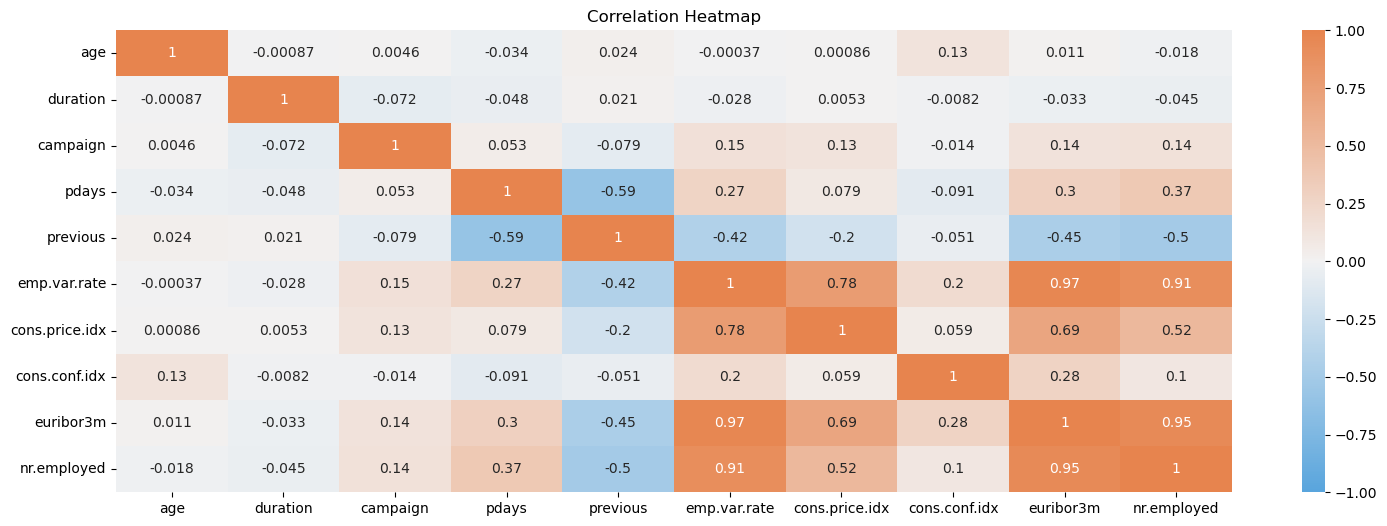

In [20]:
plt.figure(figsize=(18, 6))

pal2 = sns.diverging_palette(240, 30, l=65, as_cmap=True)

heatmap = sns.heatmap(bankdf.corr(), vmin=-1, vmax=1, annot=True,cmap=pal2)
heatmap.set_title('Correlation Heatmap')

<h1>VISUALIZATION: Numerical variables</h1>

In [21]:
# Palette 
pal = [ "#ff6600", "#0099ff", "#2BC344"]
sns.set_palette(pal)

<Axes: xlabel='age', ylabel='Density'>

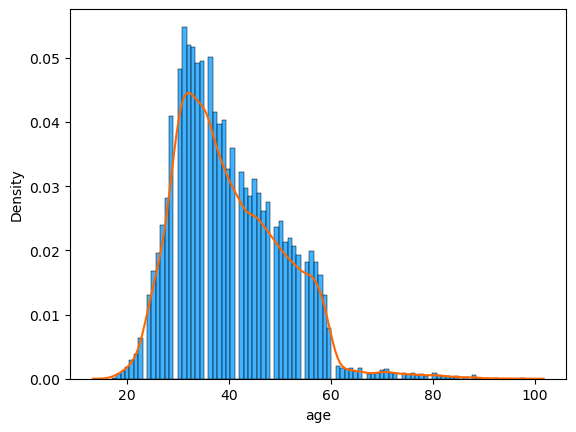

In [22]:
# Age
ax = sns.histplot(data=bankdf, x="age", kde=False, stat='density', color="#0099ff")
sns.kdeplot(data=bankdf, x="age", color="#ff6600", ax=ax)

<Axes: xlabel='duration', ylabel='Density'>

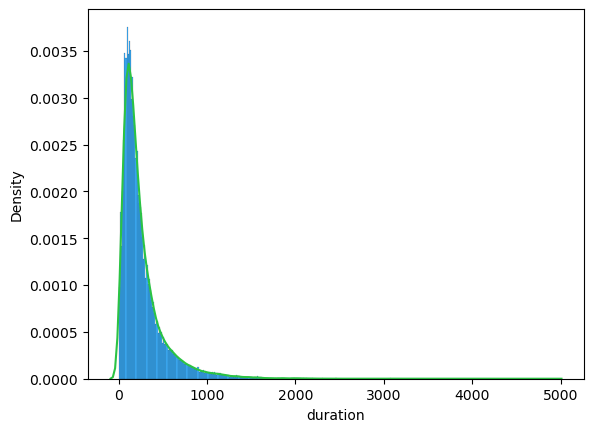

In [23]:
# Duration
ax = sns.histplot(bankdf["duration"], kde=False, stat='density', color="#0099ff")
sns.kdeplot(bankdf["duration"], color="#2BC344", ax=ax)

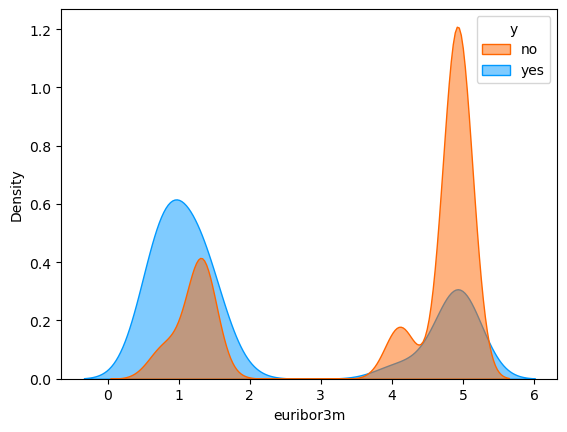

In [24]:
# Density plot with euribor3m and y outcome.
sns.kdeplot(data=bankdf, x="euribor3m", hue="y", fill=True, common_norm=False, alpha=.5)
plt.show()

C:\Users\alida\AppData\Local\Temp\ipykernel_23604\2758020678.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.kdeplot(data=bankdf, x="duration", hue="y", fill=True, common_norm=False, palette=pal, alpha = 0.5)


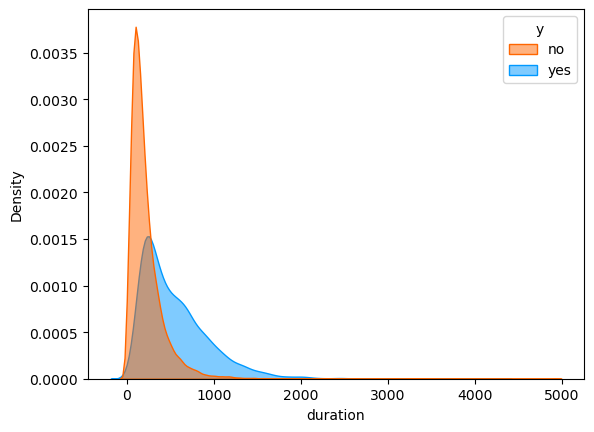

In [25]:
# VISUALIZATION: y and DURATION
sns.kdeplot(data=bankdf, x="duration", hue="y", fill=True, common_norm=False, palette=pal, alpha = 0.5)
plt.show()

<h1>VISUALIZATION: Categorical variables</h1>

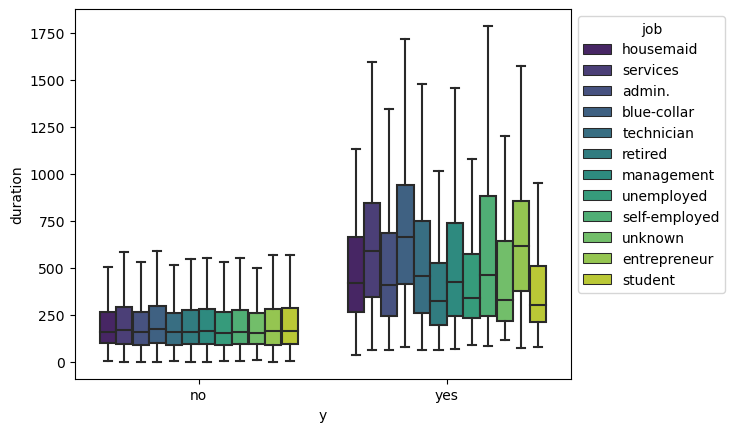

In [26]:
# Boxplot: duration, job and y
ax = sns.boxplot(data=bankdf, x="y", y="duration", hue="job", showfliers=False, palette = "viridis") # ATTENTION not showing outliers
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='marital', ylabel='age'>

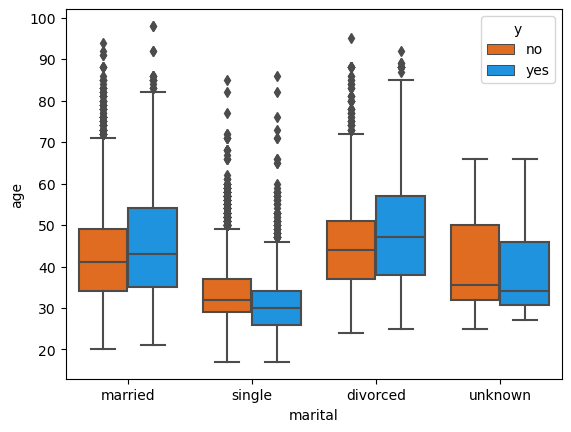

In [27]:
# Boxplot: marital status, age and outcome (y)
sns.boxplot(data=bankdf, x="marital", y="age", hue="y")

In [28]:
# Table of poutcome vs y
tab = pd.crosstab(index=bankdf["poutcome"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All","All"]
row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))


y,no,yes,All
poutcome,,,
failure,0.088545,0.014689,0.103234
nonexistent,0.787171,0.076260,0.863431
success,0.011630,0.021705,0.033335
All,0.887346,0.112654,1.000000


In [29]:
tab = pd.crosstab(index=bankdf["education"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]
row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
education,,,
basic.4y,0.102550,0.092241,0.101389
basic.6y,0.057568,0.040517,0.055647
basic.9y,0.152457,0.101940,0.146766
high.school,0.232133,0.222198,0.231014
illiterate,0.000383,0.000862,0.000437
professional.course,0.127175,0.128233,0.127294
university.degree,0.287239,0.359914,0.295426
unknown,0.040495,0.054095,0.042027
All,1.000000,1.000000,1.000000


In [30]:
tab = pd.crosstab(index=bankdf["default"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]
row = tab.index.get_level_values(0)

tab.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
default,,,
no,28391,4197,32588
unknown,8154,443,8597
yes,3,0,3
All,36548,4640,41188


In [31]:
# CREATION OF YEAR VARIABLE (from nr.employed, being a social/economic feature that changes quarterly)

nemployed = bankdf['nr.employed']
unique, index = np.unique(nemployed, return_index=True)

# 2008: 5191. , 5228.1, 5195.8
# 2009: 5176.3, 5099.1, 5076.2, 5017.5
# 2010: 5023.5, 5008.7, 4991.6, 4963.6

year_df = {'year':['2008','2008','2008','2009','2009','2009','2009','2010','2010','2010','2010'], 
           'nr.employed':[5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]}
year_df = pd.DataFrame.from_dict(year_df)

bankdf = bankdf.merge(year_df, on='nr.employed', how='left')

In [32]:
# Creating a function to convert the month abbreviation in number

bankdf["month_name"] = bankdf["month"]

def convert_month(df):
    df['month'] = [int(datetime.datetime.strptime(obv, '%b').month) for obv in df['month_name']]
    df['year'] = [int(obv) for obv in df['year']]
convert_month(bankdf)

<Axes: xlabel='year', ylabel='count'>

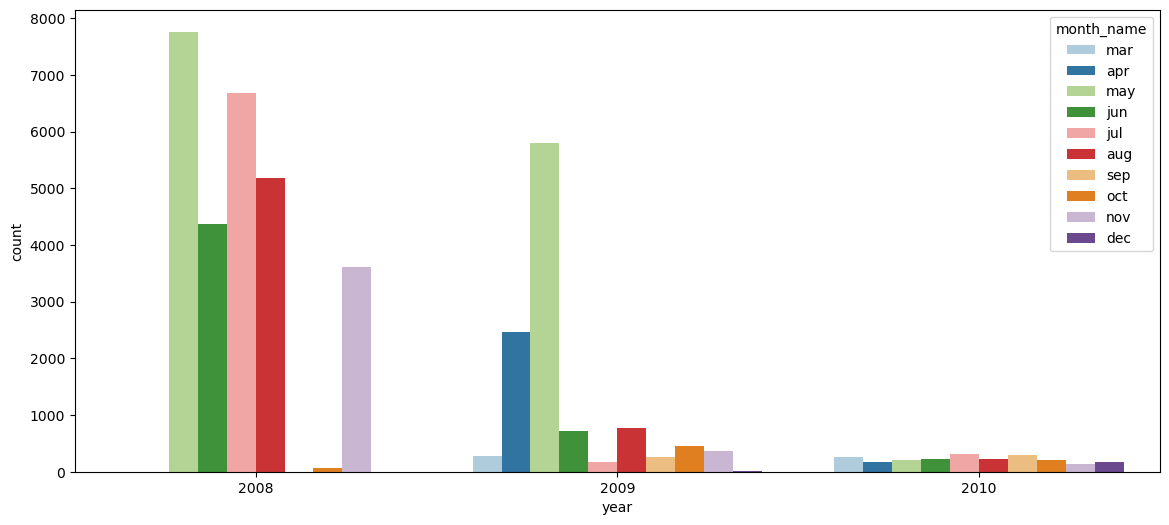

In [33]:
hue_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.figure(figsize=(14, 6))
sns.countplot(bankdf, x="year", hue="month_name", hue_order = hue_order, palette= "Paired")

<h1>PRE-PROCESSING</h1>

- Missing Values: no missing values, but some categorical variables have a class called "Unknown". How many observations having the Unknown class? Remove them? <br>
- Scaling: scale the dataset if required by the algorithm. <br>
- Dummy variables: create dummy variables for the categorical features. Drop the first class only if required by the algorithm.<br>
- Remove duplicate rows <br>
- Feature Engineering: YoungOld feature from Age. <br>
- Correlation too high: remove features being too highly correlated with others.<br>

<h3 style="color:green;">Unknowns Pre-Processing</h3>

In order to preserve interpretability and not lose too many observations, we have decided to remove the Unknowns for the following columns: job, marital, education, housing and loan. 
Furthermore, we decided to keep the Unknown class for the default variables.  

In [34]:
# Unknown count

#bankdf.nunique()
#bankdf.isnull().sum() # no NAs but there are some classes "Unknown", what should we do with them?

for column in bankdf.select_dtypes(include=object):
     print("\n" + column)
     print(bankdf[column].value_counts().to_markdown())
    
# job: 330 
# marital: 80
# education: 1731
# default: 8597
# housing 990
# loan: 990


job
|               |   job |
|:--------------|------:|
| admin.        | 10422 |
| blue-collar   |  9254 |
| technician    |  6743 |
| services      |  3969 |
| management    |  2924 |
| retired       |  1720 |
| entrepreneur  |  1456 |
| self-employed |  1421 |
| housemaid     |  1060 |
| unemployed    |  1014 |
| student       |   875 |
| unknown       |   330 |

marital
|          |   marital |
|:---------|----------:|
| married  |     24928 |
| single   |     11568 |
| divorced |      4612 |
| unknown  |        80 |

education
|                     |   education |
|:--------------------|------------:|
| university.degree   |       12168 |
| high.school         |        9515 |
| basic.9y            |        6045 |
| professional.course |        5243 |
| basic.4y            |        4176 |
| basic.6y            |        2292 |
| unknown             |        1731 |
| illiterate          |          18 |

default
|         |   default |
|:--------|----------:|
| no      |     32588 |


In [35]:
# Dealing with Unknowns: 
bankdf = bankdf[(bankdf['job'] != "unknown") & (bankdf['marital'] != "unknown") & (bankdf['education'] != "unknown")
                 & (bankdf['housing'] != "unknown") & (bankdf['loan'] != "unknown")]

In [36]:
# Dropping the Default variable.... only 3 observations in the "yes" class and too many unknowns. 
bankdf = bankdf.drop(['default'], axis=1)

<h3 style="color:green;">Correlation Pre-Processing</h3>

The social and economic variables are highly-correlated, especially considering emp.var.rate which has some correlations with the other economic variables close to 1.
#We have considered two different approached that could work in this case: (1) dimensionality reduction (for example PCA);(2) dropping the emp.var.rate variable. 

We have decided to go with the second option, since a dimensionality reduction would have been extremely complicated to interpret in the model's results. 

Furthermore, the same problem concerns the two features called: pdays and previous, containing almost the same kind of  information. Additionally, the pdays variable has many values to 999 (indicating no previous calls, that could lead to tricky results in the analysis. Thus, we are dropping the pdays. 

Last, we are dropping year because correlation is too high with the economic and social features (was created starting from those)

In [39]:
# High Correlation:
bankdf = bankdf.drop(['emp.var.rate', 'pdays', 'month_name', 'year'], axis=1)

In [40]:
# Remove duplicates: from 38245 to 38232
bankdf = bankdf.drop_duplicates()
len(bankdf)

38232

<h3 style="color:green;">Fairness Pre-Processing (AGE)</h3>

Based on the following paper:
Max Hort and Federica Sarro. 2022. "Privileged and Unprivileged Groups: An Empirical Study on the Impact of the Age Attribute on Fairness." In International Workshop on Equitable Data and Technology (FairWare ’22 ), May 9, 2022, Pittsburgh, PA, USA. ACM, New York, NY, USA, 8 pages.
https://doi.org/10.1145/3524491.3527308

Age threshold used: 47, which minimizes the mean difference (-0.05) between the Young and Old sensitive groups. Metric used is the Demographic Parity Difference. 

In [41]:
# Pre-Processing Fairness. Why is AGE so important in the classification models? Look at feature importance of RF and XGboost, 
# Age is at the very top even if there is no rationale for it to be so high... Could be a sign of unfairness?

# 0 if < 47 (Young), 1  if >=47 (Old)
bankdf['YoungOld'] = np.where(bankdf['age'] < 47, '0', '1')
bankdf['YoungOld'] = bankdf['YoungOld'].astype(str).astype(int)
bankdf = bankdf.drop(['age'], axis=1)

<h1>CLASSIFICATION</h1>

Start with the default version of each model. Then, try to improve it by usign GridSearchCV or RandomizedSearchCV to tune the hyperparameters. 

- Logistic Regression (default + regularization with Ridge and Lasso)
- KNN (default + GridSearchCV for hyperparameters)
- Decision Trees (default + pre and post pruning)
- Ensamble Decision Trees: Random Forests and XGBoost

<h3 style="color:green;">Encoding and Dummy reasoning</h3>

Logistic Regression -> dummy trap, need dummy variables dropping first class. Scaling not mandatory but useful (especially for regularization).

KNN -> Feature scaling is extremely important. Dummy variables needed but no dummy trap. 

Tree-based models -> do not need scaling nor dummies. 

In [42]:
# 1 if yes, otherwise 0
bankdf['y'] = np.where(bankdf['y']=='yes', 1, 0)
bankdf['housing'] = np.where(bankdf['housing'] =='yes', 1, 0)
bankdf['loan'] = np.where(bankdf['loan'] =='yes', 1, 0)

In [43]:
# Define X and y
X = bankdf.drop('y', axis=1)
y = bankdf["y"]

# Get dummies for both tree and non tree
X_dummy_nt = pd.get_dummies(X, drop_first = True) # non tree
X_dummy_t = pd.get_dummies(X, drop_first = False) # tree

In [44]:
# Dataset split into test, validation and training set:

# NON-TREE BASED (logistic regression and KNN)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_dummy_nt, y, test_size=0.2, random_state=8) # train and test
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_s, y_train_s, test_size=0.2, random_state=8) # train and validation

print("Xtrain_s", X_train_s.shape, "y_train_s", 
      y_train_s.shape, "X_test_s", X_test_s.shape, "X_val_s", X_val_s.shape, "y_val_s", 
      y_val_s.shape, "X_test_s", X_test_s.shape, "y_test_s", y_test_s.shape) 

Xtrain_s (24468, 36) y_train_s (24468,) X_test_s (7647, 36) X_val_s (6117, 36) y_val_s (6117,) X_test_s (7647, 36) y_test_s (7647,)


In [45]:
# TREE BASED
X_train, X_test, y_train, y_test = train_test_split(X_dummy_t, y, test_size=0.2, random_state=8) # train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8) # train and validation

print("Xtrain", X_train.shape, "y_train", 
      y_train.shape, "X_val", X_val.shape, "y_val", 
      y_val.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

Xtrain (24468, 42) y_train (24468,) X_val (6117, 42) y_val (6117,) X_test (7647, 42) y_test (7647,)


In [46]:
# Feature scaling for meaningful numeric variables
numeric = ['month', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
other = ['housing', 'loan', 'YoungOld', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success']

scaler = preprocessing.StandardScaler().fit(X_train_s[numeric])

train_idx = X_train_s.index
X_train_standardized = pd.DataFrame(data = scaler.transform(X_train_s[numeric]), columns = numeric)
X_train_standardized = X_train_standardized.set_index(train_idx)

val_idx = X_val_s.index
X_val_standardized = pd.DataFrame(data = scaler.transform(X_val_s[numeric]), columns = numeric)
X_val_standardized = X_val_standardized.set_index(val_idx)

test_idx = X_test_s.index
X_test_standardized = pd.DataFrame(data = scaler.transform(X_test_s[numeric]), columns = numeric)
X_test_standardized = X_test_standardized.set_index(test_idx)

In [47]:
# Add back other columns 
X_train_standardized[other] = X_train_s[other]
X_val_standardized[other] = X_val_s[other]
X_test_standardized[other] = X_test_s[other]

<h2 style="color:red;">Logistic Regression</h2>

<h3 style="color:green;">Logistic Regression</h3>

In [39]:
# Logistic Regression, using l2 penalty (Ridge, default)

model_logit = LogisticRegression(random_state = 42, solver = 'liblinear') 
model_logit.fit(X_train_standardized,y_train)

# score
print("The score of the training set is: ", model_logit.score(X_train_standardized,y_train)) 
print("The score of the validation set is: ", model_logit.score(X_val_standardized,y_val)) 

The score of the training set is:  0.9118849109040379
The score of the validation set is:  0.91106751675658


In [40]:
# coefficient
coefficient = model_logit.coef_
coefficient

array([[-5.57406681e-02,  1.17536577e+00, -1.08930876e-01,
         1.96937936e-02,  1.62063468e-01,  2.43153066e-01,
        -4.91601904e-01, -5.82509876e-01, -1.27575699e-02,
        -1.16853196e-01,  9.09129152e-02, -3.69333965e-01,
        -1.69492274e-01, -1.62119928e-01, -1.35308563e-01,
         2.49991750e-01,  2.57526633e-02, -3.17925433e-01,
         3.36375122e-01, -4.24503515e-02,  2.38053425e-01,
        -7.75383539e-02,  9.57457521e-02,  1.36262315e-02,
        -1.00589550e-01,  9.22364026e-03,  4.69345259e-01,
         5.95825874e-02,  1.93183917e-01, -6.76112156e-01,
        -1.21155897e-01,  6.27269415e-02,  6.67928742e-04,
         5.95291655e-02,  4.89976003e-01,  1.68805838e+00]])

In [41]:
# odds
odds = np.exp(coefficient)
odds

array([[0.94578438, 3.23932758, 0.89679241, 1.019889  , 1.17593487,
        1.27526381, 0.61164581, 0.55849485, 0.98732346, 0.8897158 ,
        1.09517363, 0.69119454, 0.84409328, 0.85033922, 0.87344636,
        1.28401482, 1.02608713, 0.72765705, 1.39986405, 0.95843805,
        1.26877698, 0.92539153, 1.10047923, 1.01371949, 0.90430413,
        1.00926631, 1.59894695, 1.06139342, 1.21310588, 0.50859047,
        0.88589584, 1.06473606, 1.00066815, 1.06133671, 1.63227705,
        5.40896832]])

<h4 style="color:red;">Interpretation of C in Logistic Regression</h4>

The C parameter in logistic regression controls the inverse of the regularization strength.
This means a smaller value of C specifies stronger regularization, and a larger value specifies weaker regularization. For instance, 0.1 is strong (smaller coefficients), 0.9 is weak.

In [42]:
# Tuning alpha/lambda and choice between Ridge and Lasso regularizaion

# define grid
lr_grid = {
    'penalty': ["l1", "l2"],
    'C':  np.arange(0.1, 1.1, 0.1)
}

# Set up GridSearchCV 
grid_search = GridSearchCV(model_logit, lr_grid, cv=5, n_jobs=-1)

In [43]:
# Fit the grid search 
grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

# Retrieve the best hyperparameters and the corresponding best estimator
best = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best regularization: {best}")
# Best regularization:  {'C': 0.3, 'penalty': 'l1'} -> LASSO WITH ALPHA 0.3

Accuracy score for {'C': 0.1, 'penalty': 'l1'}: 0.9114353332128975
Accuracy score for {'C': 0.1, 'penalty': 'l2'}: 0.91143534991691
Accuracy score for {'C': 0.2, 'penalty': 'l1'}: 0.9114353081568785
Accuracy score for {'C': 0.2, 'penalty': 'l2'}: 0.9115579406658437
Accuracy score for {'C': 0.30000000000000004, 'penalty': 'l1'}: 0.9117622641487373
Accuracy score for {'C': 0.30000000000000004, 'penalty': 'l2'}: 0.9115579323138373
Accuracy score for {'C': 0.4, 'penalty': 'l1'}: 0.9117622557967309
Accuracy score for {'C': 0.4, 'penalty': 'l2'}: 0.9115170575948511
Accuracy score for {'C': 0.5, 'penalty': 'l1'}: 0.9117622641487373
Accuracy score for {'C': 0.5, 'penalty': 'l2'}: 0.9115170575948511
Accuracy score for {'C': 0.6, 'penalty': 'l1'}: 0.9117213977817572
Accuracy score for {'C': 0.6, 'penalty': 'l2'}: 0.911639656695791
Accuracy score for {'C': 0.7000000000000001, 'penalty': 'l1'}: 0.9116396650477974
Accuracy score for {'C': 0.7000000000000001, 'penalty': 'l2'}: 0.911557923961831
Accu

In [44]:
# Evaluate the best model on the test data
print(f"Validation Accuracy with best model: {best_lr_model.score(X_train_standardized, y_train)}")
print(f"Validation Accuracy with best model: {best_lr_model.score(X_val_standardized, y_val)}")

Validation Accuracy with best model: 0.9115988229524277
Validation Accuracy with best model: 0.9112309955860716


In [46]:
coefficient = best_lr_model.coef_

coeff = pd.DataFrame(coefficient)
columns = X_train_standardized.columns
coeff.columns = columns
coeff = coeff.transpose(copy=False)
coeff

,0
month,-0.053179
duration,1.171722
campaign,-0.103142
previous,0.008903
cons.price.idx,0.138723
cons.conf.idx,0.232915
euribor3m,-0.430506
nr.employed,-0.630475
housing,-0.002581
loan,-0.098518


<h2 style="color:red;">KNN</h2>

If the score gives "AttributeError: 'Flags' object has no attribute 'c_contiguous':
It is a bug in the 1.3.0 version. If you install the 1.2.2 version of scikit-learn it disapears.

pip uninstall scikit-learn <br>
pip install scikit-learn==1.2.2

In [47]:
# KNN

kn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2) # p is the power parameter for the Minkowski metric (2 Euclidean) 
kn.fit(X_train_standardized,y_train)

print("The score of the training set is: ", kn.score(X_train_standardized,y_train))
print("The score of the validation set is: ", kn.score(X_val_standardized,y_val))

The score of the training set is:  0.9288867091711623
The score of the validation set is:  0.8983161680562367


<h3 style="color:green;">How many k? Distance metric? Grid Search</h3>

In [48]:
# The rule of thumb is sqrt(n)
k = math.ceil(math.sqrt(X_train_standardized.shape[0])) # even or odd number?

In [49]:
n_neighbors = np.arange(1, k, 2)
accuracy_train =  []
accuracy_val = []

for k in n_neighbors:
    kn_tuning = KNeighborsClassifier(n_neighbors=k) # with Euclidean Distance
    kn_tuning.fit(X_train_standardized,y_train)
    
    accuracy_train.append(kn_tuning.score(X_train_standardized,y_train))
    accuracy_val.append(kn_tuning.score(X_val_standardized,y_val))

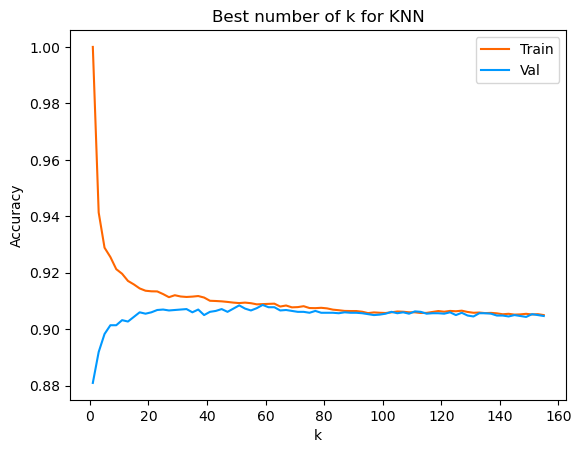

In [50]:
plt.title('Best number of k for KNN')
plt.plot(n_neighbors, accuracy_train, label = 'Train')
plt.plot(n_neighbors, accuracy_val, label = 'Val')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

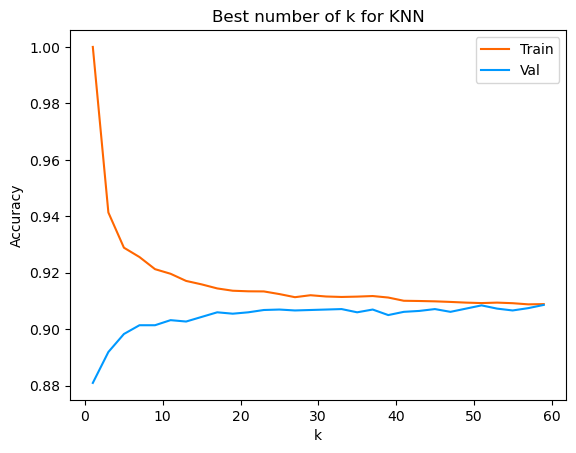

In [52]:
# zoom in
plt.title('Best number of k for KNN')
plt.plot(n_neighbors[0:30], accuracy_train[0:30], label = 'Train')
plt.plot(n_neighbors[0:30], accuracy_val[0:30], label = 'Val')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [53]:
d = {'k': n_neighbors[3:30], 'train': accuracy_train[3:30],  'val': accuracy_val[3:30]}
results_df = pd.DataFrame(d)

results_df["diff"] = results_df["train"] - results_df["val"]
results_df

,k,train,val,diff
0,7,0.925576,0.901422,0.024154
1,9,0.921285,0.901422,0.019863
2,11,0.919650,0.903221,0.016430
3,13,0.917116,0.902730,0.014386
4,15,0.915890,0.904365,0.011525
5,17,0.914460,0.906000,0.008460
6,19,0.913642,0.905509,0.008133
7,21,0.913438,0.906000,0.007438
8,23,0.913397,0.906817,0.006580
9,25,0.912457,0.906981,0.005477


In [54]:
# Grid Search for both k and distance (p)
kn_grid = {
    'n_neighbors': np.array([15, 25, 33, 37, 41, 45]),
    'p': np.arange(1, 3) # 1 being Manhattan and 2 being Euclidean
}

In [55]:
# Set up GridSearchCV

grid_search = GridSearchCV(KNeighborsClassifier(), kn_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

Accuracy score for {'n_neighbors': 15, 'p': 1}: 0.9023621895987286
Accuracy score for {'n_neighbors': 15, 'p': 2}: 0.9041604767859743
Accuracy score for {'n_neighbors': 25, 'p': 1}: 0.9027708950285602
Accuracy score for {'n_neighbors': 25, 'p': 2}: 0.9055909332623747
Accuracy score for {'n_neighbors': 33, 'p': 1}: 0.9032612830803135
Accuracy score for {'n_neighbors': 33, 'p': 2}: 0.9057543987302946
Accuracy score for {'n_neighbors': 37, 'p': 1}: 0.9029344022565116
Accuracy score for {'n_neighbors': 37, 'p': 2}: 0.9052639104544653
Accuracy score for {'n_neighbors': 41, 'p': 1}: 0.902484822107694
Accuracy score for {'n_neighbors': 41, 'p': 2}: 0.9052638770464398
Accuracy score for {'n_neighbors': 45, 'p': 1}: 0.9024438889246632
Accuracy score for {'n_neighbors': 45, 'p': 2}: 0.9050596120275907


In [56]:
# Retrieve the best hyperparameters
best_param = grid_search.best_params_
best_param
best_knn_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of KNN hyperparameters: {best_param}")

# Best combination of KNN hyperparameters: {'n_neighbors': 33, 'p': 2}

Best combination of KNN hyperparameters: {'n_neighbors': 33, 'p': 2}


In [57]:
best_knn_model.fit(X_train_standardized,y_train)

print("The score of the training set is: ", best_knn_model.score(X_train_standardized,y_train)) 
print("The score of the validation set is: ", best_knn_model.score(X_val_standardized,y_val)) 

The score of the training set is:  0.911435344122936
The score of the validation set is:  0.9071440248487821


<h2 style="color:red;">Classification Trees</h2>

In [58]:
# Classification Trees
dtree = tree.DecisionTreeClassifier(random_state = 42) 
dtree.fit(X_train, y_train) 
print("The score of the training set is: ", dtree.score(X_train, y_train)) # 1.....OVERFITTING
print("The score of the validation set is: ", dtree.score(X_val, y_val))

The score of the training set is:  1.0
The score of the validation set is:  0.8860552558443682


<h3 style="color:green;">Pre-Pruning: max_depth, min_samples_leaf and min_samples_split</h3>

In [59]:
# Pruning: max_depth, min_samples_leaf and min_samples_split

y_axis = []
for max_d in range(1,21):
    dtree = tree.DecisionTreeClassifier(max_depth=max_d, random_state=42)
    dtree.fit(X_train, y_train)
    y_axis.append(dtree.score(X_train, y_train))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), dtree.score(X_train, y_train))

The Training Accuracy for max_depth 1 is: 0.889651790093183
The Training Accuracy for max_depth 2 is: 0.9056727153833578
The Training Accuracy for max_depth 3 is: 0.9109857773418343
The Training Accuracy for max_depth 4 is: 0.9152362269086153
The Training Accuracy for max_depth 5 is: 0.9169936243256498
The Training Accuracy for max_depth 6 is: 0.9203040706228544
The Training Accuracy for max_depth 7 is: 0.9241049534085336
The Training Accuracy for max_depth 8 is: 0.9293362759522642
The Training Accuracy for max_depth 9 is: 0.9355893411803171
The Training Accuracy for max_depth 10 is: 0.942659800555828
The Training Accuracy for max_depth 11 is: 0.9502206964198137
The Training Accuracy for max_depth 12 is: 0.9588442046754945
The Training Accuracy for max_depth 13 is: 0.9662416217099885
The Training Accuracy for max_depth 14 is: 0.9737207781592284
The Training Accuracy for max_depth 15 is: 0.9803416707536374
The Training Accuracy for max_depth 16 is: 0.9849599476867745
The Training Accura

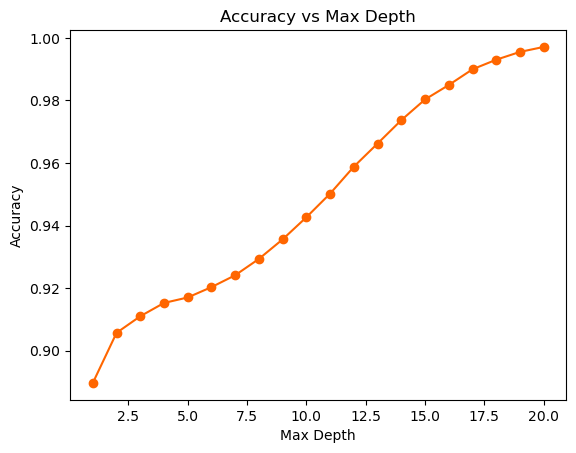

In [60]:
x_axis = range(1,21,1)
y_axis

plt.plot(x_axis, y_axis, marker = 'o')
plt.title("Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In [61]:
tree_grid = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21,2).tolist(),
              'min_samples_split':np.arange(2,11,2).tolist(),
              'max_leaf_nodes':np.arange(3,26).tolist()}

# create an instance of the grid search object
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid, cv=5, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
duration = time.time() - start_time
# 294.6703038215637 seconds

In [62]:
# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_

# Retrieve the best hyperparameters
best_param = grid_search.best_params_
best__tunedtree_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of hyperparameters: {best_param}")

# Best combination of hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 20, 'min_samples_split': 2}

Best combination of hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 20, 'min_samples_split': 2}


In [63]:
best__tunedtree_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_leaf_nodes= 20,
                                                    min_samples_split= 2, random_state = 42)

best__tunedtree_model.fit(X_train, y_train)

print("The score of the training set is: ", best__tunedtree_model.score(X_train,y_train))
print("The score of the validation set is: ", best__tunedtree_model.score(X_val,y_val)) 

The score of the training set is:  0.9180562367173452
The score of the validation set is:  0.9177701487657348


[Text(0.41898148148148145, 0.9285714285714286, 'nr.employed <= 5087.65\ngini = 0.196\nsamples = 24468\nvalue = [21768, 2700]'),
 Text(0.14814814814814814, 0.7857142857142857, 'duration <= 165.5\ngini = 0.494\nsamples = 2803\nvalue = [1552, 1251]'),
 Text(0.07407407407407407, 0.6428571428571429, 'duration <= 123.5\ngini = 0.268\nsamples = 1017\nvalue = [855, 162]'),
 Text(0.037037037037037035, 0.5, 'gini = 0.166\nsamples = 634\nvalue = [576, 58]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.396\nsamples = 383\nvalue = [279, 104]'),
 Text(0.2222222222222222, 0.6428571428571429, 'poutcome_success <= 0.5\ngini = 0.476\nsamples = 1786\nvalue = [697, 1089]'),
 Text(0.18518518518518517, 0.5, 'duration <= 248.5\ngini = 0.498\nsamples = 1302\nvalue = [613, 689]'),
 Text(0.14814814814814814, 0.35714285714285715, 'gini = 0.481\nsamples = 427\nvalue = [255, 172]'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.483\nsamples = 875\nvalue = [358, 517]'),
 Text(0.25925925925925924, 0.5, 'gini

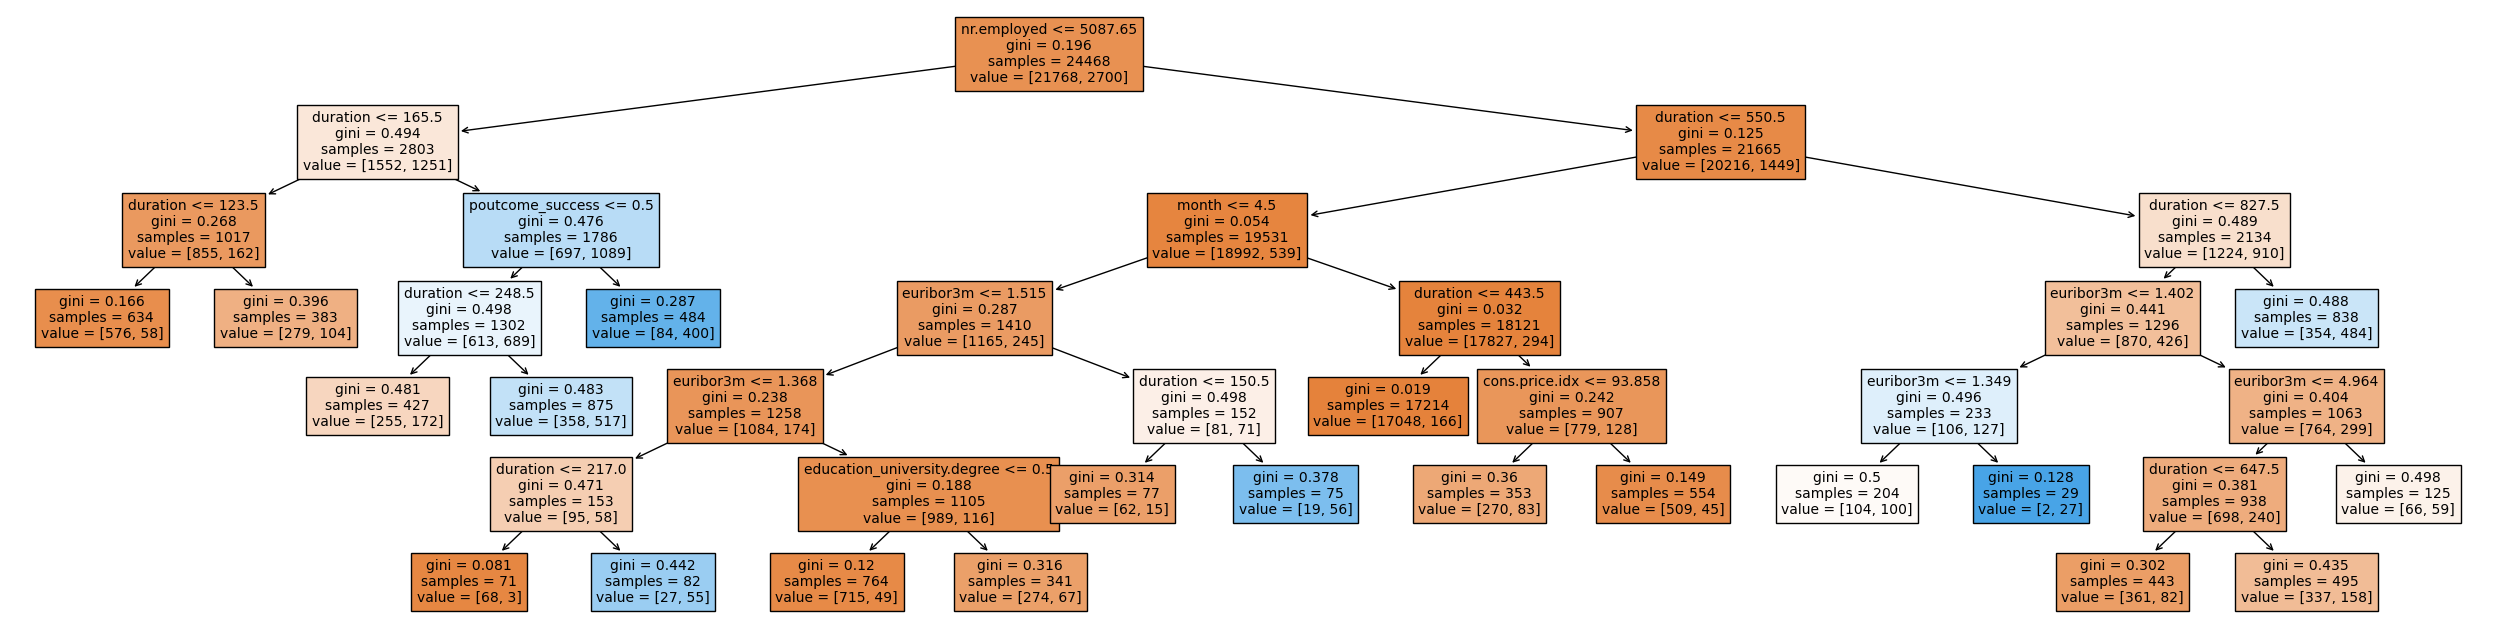

In [64]:
plt.figure(figsize=(32,8))
tree.plot_tree(best__tunedtree_model,
               feature_names=list(X_train.columns), 
               filled=True, 
               fontsize=10) 

<h3 style="color:green;">Post-Pruning: ccp_alphas</h3>

In [65]:
# Post-Pruning
# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

dtree = tree.DecisionTreeClassifier(random_state=42) 
path = dtree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

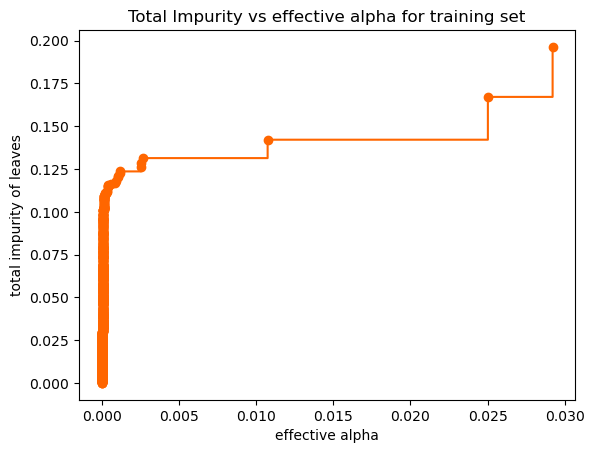

In [66]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree with one node.

In [67]:
clfs = [] #building the different decision trees for each ccp_alpha
for ccp_alpha in ccp_alphas:
    dtree = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtree.fit(X_train, y_train)
    clfs.append(dtree)

# Number of nodes in the last tree is: 1 

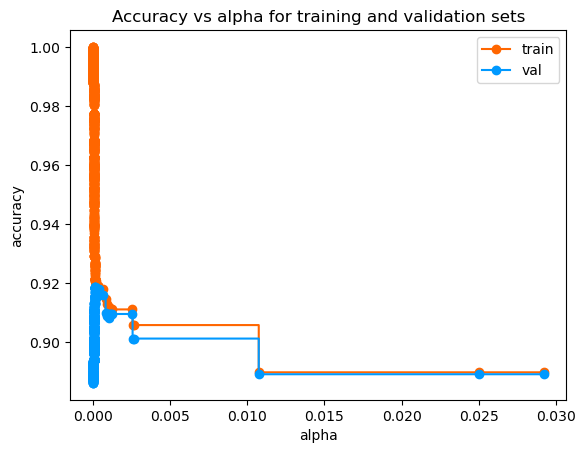

In [68]:
train_scores =[]
val_scores =[]

for tree in clfs: 
    train_scores.append(tree.score(X_train, y_train))
    val_scores.append(tree.score(X_val, y_val))
    
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()

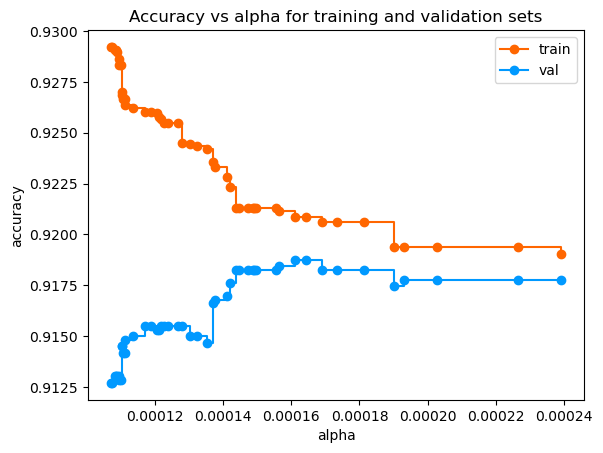

In [71]:
# zoom in of previous plot
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas[710:-20], train_scores[710:-20],marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[710:-20], val_scores[710:-20], marker="o",label="val", drawstyle="steps-post")
ax.legend()
plt.show()

In [72]:
d = {'ccp_alpha':ccp_alphas[710:-20], 'train': train_scores[710:-20],  'val': val_scores[710:-20]}
results_df = pd.DataFrame(d)
results_df

,ccp_alpha,train,val
0,0.000107,0.929214,0.912702
1,0.000107,0.929214,0.912702
2,0.000108,0.929050,0.913029
3,0.000109,0.929050,0.913029
4,0.000109,0.928968,0.913029
5,0.000109,0.928641,0.913029
6,0.000110,0.928315,0.912866
7,0.000110,0.928315,0.912866
8,0.000110,0.927007,0.914501
9,0.000110,0.926843,0.914501


In [73]:
# Best ccp_alpha: 0.000161
best_ccp_alpha = float(0.000161)
from sklearn import tree
best_posttree_model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)

best_posttree_model.fit(X_train, y_train) 
print("The score of the training set is: ", best_posttree_model.score(X_train, y_train))
print("The score of the validation set is: ", best_posttree_model.score(X_val, y_val))

The score of the training set is:  0.9211623344776851
The score of the validation set is:  0.9184240640837011


[Text(0.388671875, 0.9545454545454546, 'nr.employed <= 5087.65\ngini = 0.196\nsamples = 24468\nvalue = [21768, 2700]'),
 Text(0.125, 0.8636363636363636, 'duration <= 165.5\ngini = 0.494\nsamples = 2803\nvalue = [1552, 1251]'),
 Text(0.0625, 0.7727272727272727, 'duration <= 123.5\ngini = 0.268\nsamples = 1017\nvalue = [855, 162]'),
 Text(0.041666666666666664, 0.6818181818181818, 'duration <= 77.5\ngini = 0.166\nsamples = 634\nvalue = [576, 58]'),
 Text(0.020833333333333332, 0.5909090909090909, 'gini = 0.034\nsamples = 228\nvalue = [224, 4]'),
 Text(0.0625, 0.5909090909090909, 'cons.conf.idx <= -30.75\ngini = 0.231\nsamples = 406\nvalue = [352, 54]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.169\nsamples = 289\nvalue = [262, 27]'),
 Text(0.08333333333333333, 0.5, 'marital_married <= 0.5\ngini = 0.355\nsamples = 117\nvalue = [90, 27]'),
 Text(0.0625, 0.4090909090909091, 'gini = 0.485\nsamples = 46\nvalue = [27, 19]'),
 Text(0.10416666666666667, 0.4090909090909091, 'gini = 0.2\nsamples =

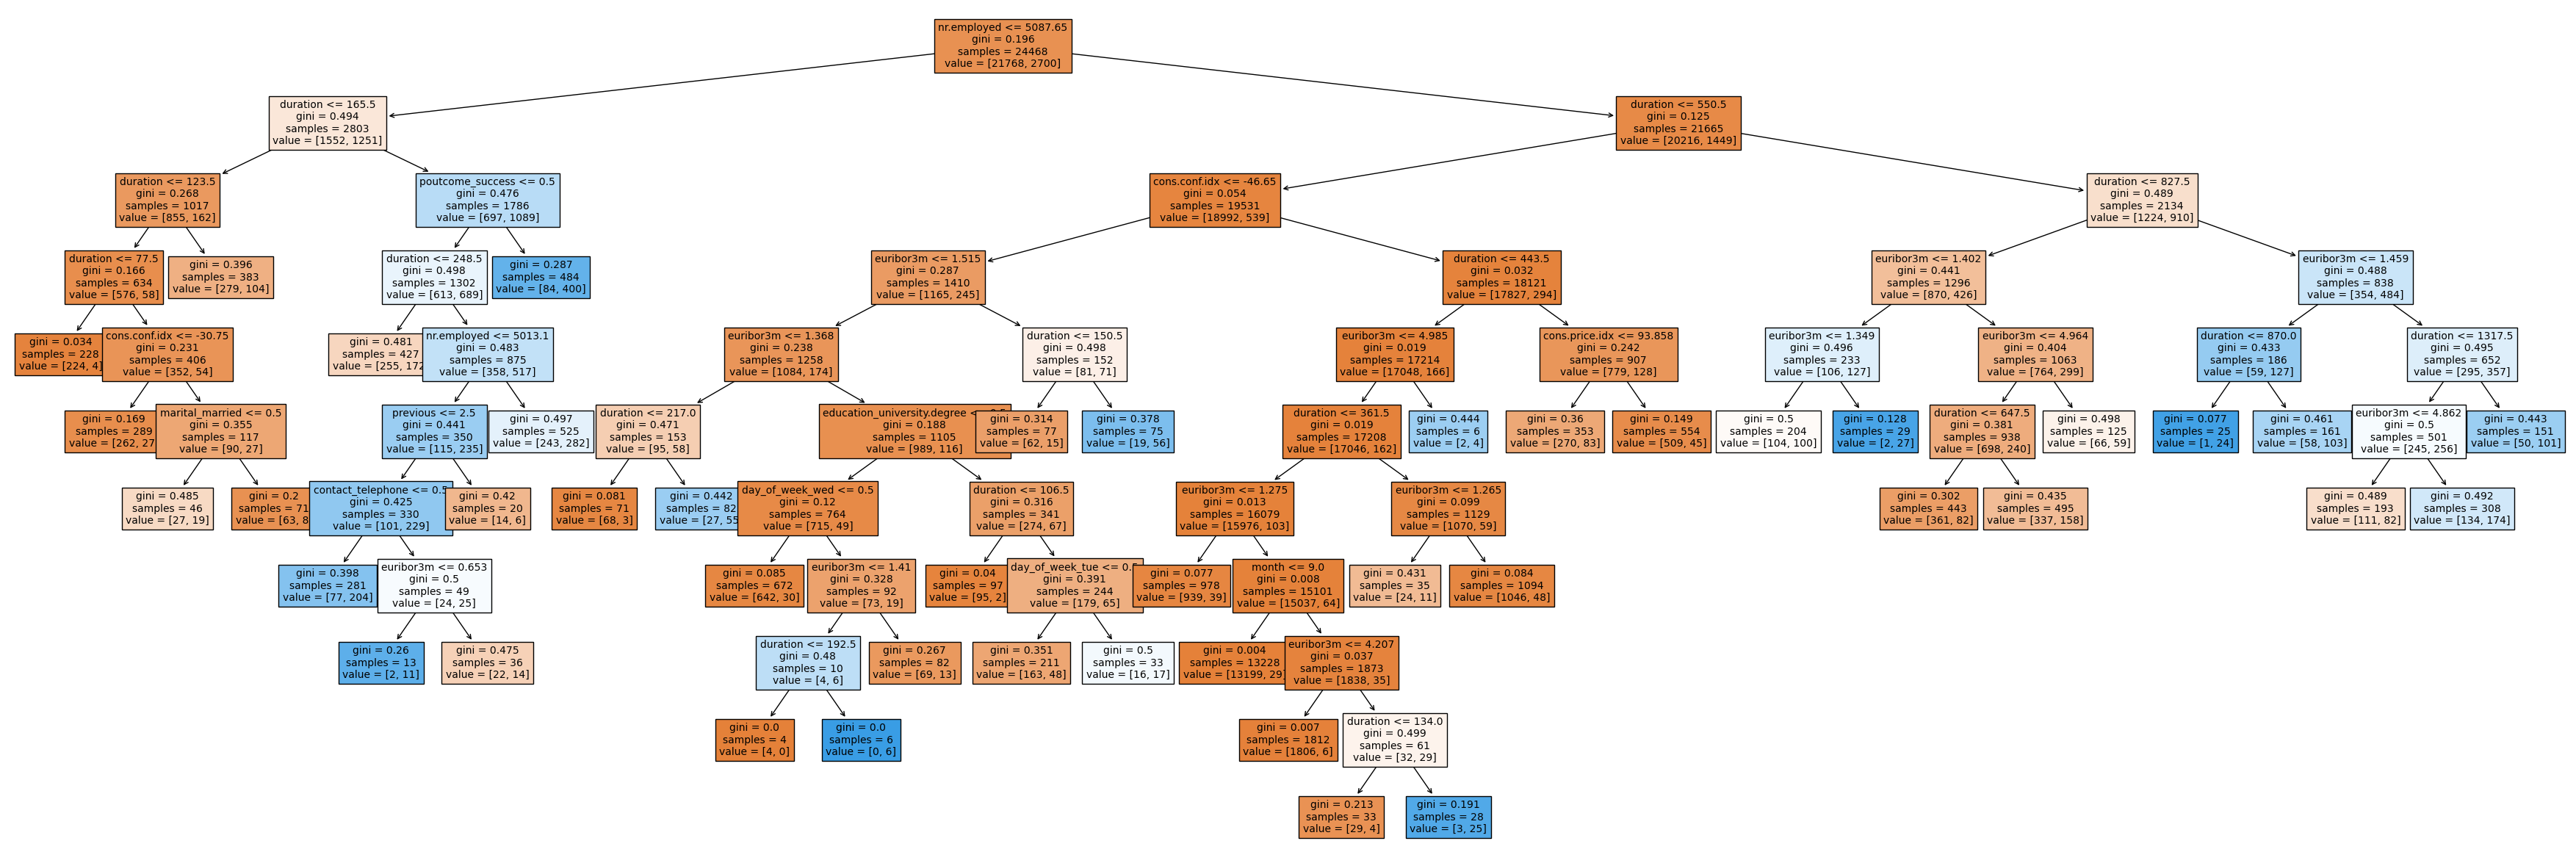

In [75]:
plt.figure(figsize=(45,15))
tree.plot_tree(best_posttree_model,
               feature_names=list(X_train.columns), 
               filled=True, 
               fontsize=10) 

<h2 style="color:red;">Ensamble Methods</h2>

<h3 style="color:green;">Random Forests</h3>

In [76]:
# Random Forests
rf = RandomForestClassifier(random_state = 42) # everything default
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train))) # 1.... OVERFITTING!!!
print("Accuracy on validation set: {:.3f}".format(rf.score(X_val, y_val)))

Accuracy on training set: 1.000
Accuracy on validation set: 0.912


Parameters to tune: 

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

In [77]:
# Tuning parameters: grid definition
param_grid = {
    'max_depth': np.arange(10, 100, 10),
    'max_features': np.arange(2,30,2),
    'min_samples_leaf': np.arange(5,30,5),
    'min_samples_split': np.arange(2,20,2),
    'n_estimators': np.arange(10,400,10)
}

In [78]:
# RANDOM SEARCH

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv=5, n_jobs=-1, random_state=42)

start_time = time.time()
random_search.fit(X_train, y_train)
duration = time.time() - start_time

In [79]:
# Retrieve and print the scores for each iteration
cv_results = random_search.cv_results_

# Retrieve the best hyperparameters
best_param = random_search.best_params_
best_rf_model = random_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of hyperparameters: {best_param}")

#{'n_estimators': 330, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 26, 'max_depth': 50}

Best combination of hyperparameters: {'n_estimators': 330, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 26, 'max_depth': 50}


In [80]:
best_rf_model.fit(X_train, y_train)

print("The score of the training set is: ", best_rf_model.score(X_train,y_train))
print("The score of the validation set is: ", best_rf_model.score(X_val,y_val)) 

The score of the training set is:  0.9424145823115907
The score of the validation set is:  0.918097106424718


Text(0.5, 0, 'Importance')

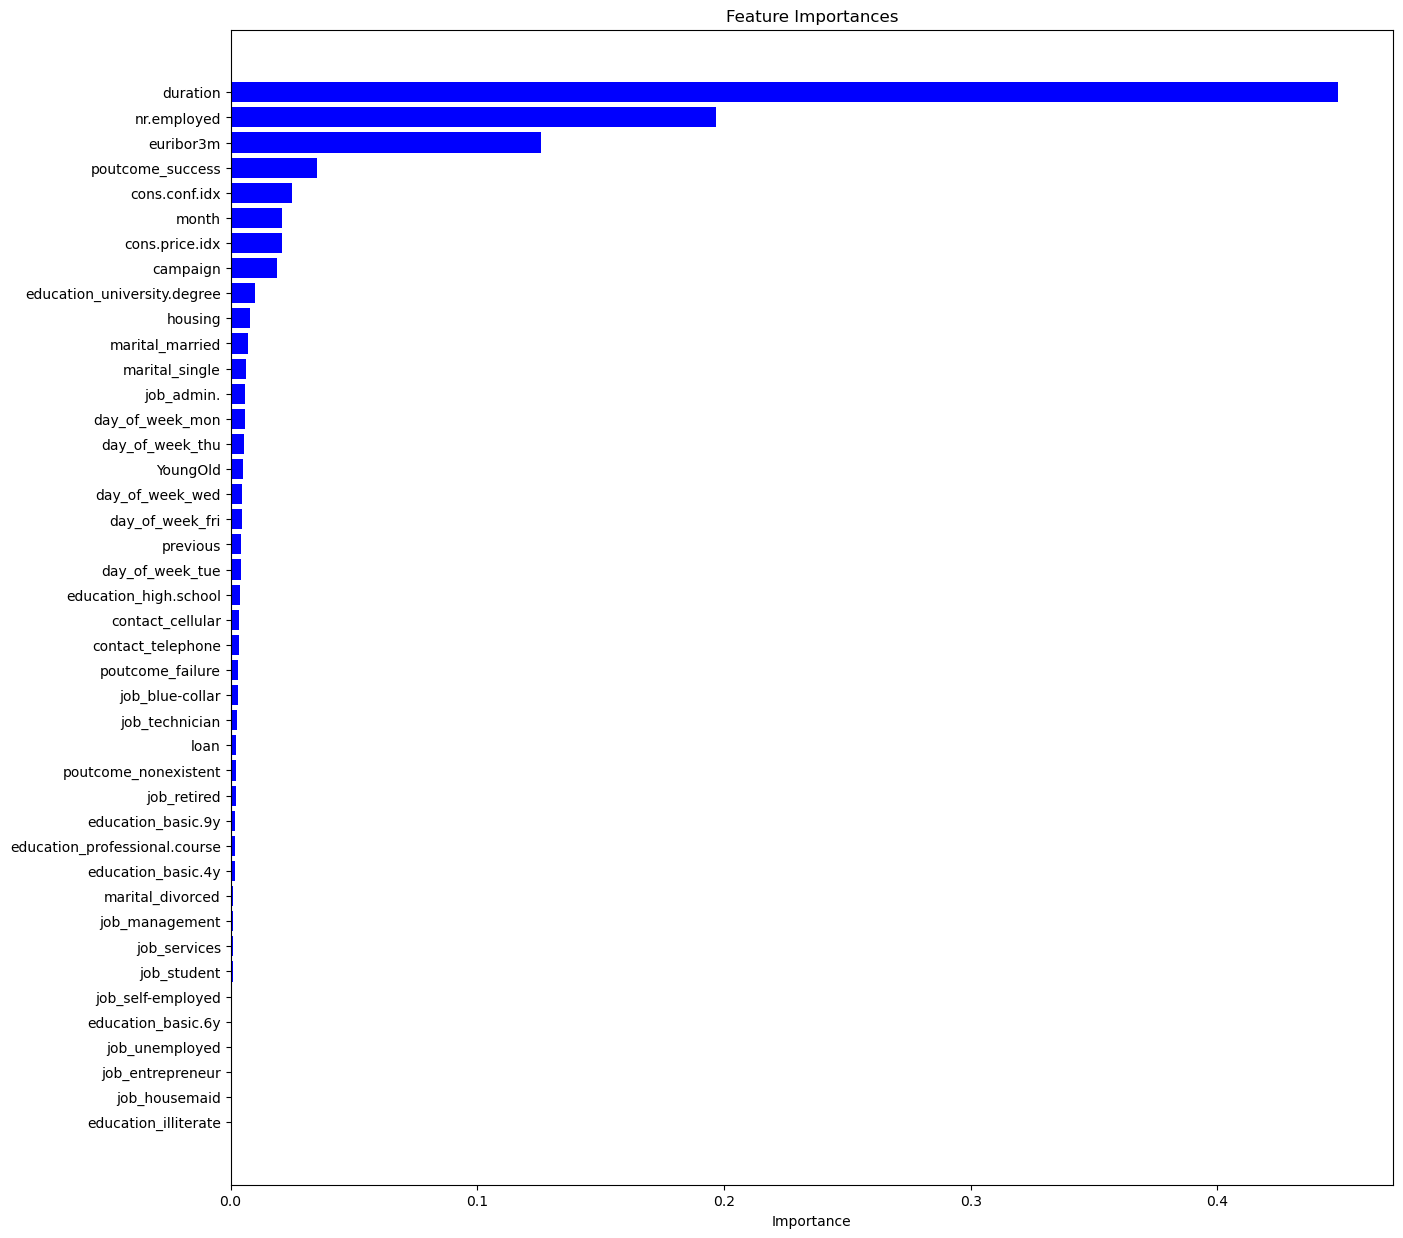

In [81]:
feature_importance = best_rf_model.feature_importances_
features= X_train.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

<h3 style="color:green;">XGBoost</h3>

In [82]:
# XGBoost
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, # everything default
                                    max_depth=3, random_state=42)


gboost.fit(X_train, y_train) 
print("The score of the training set is: ", gboost.score(X_train, y_train)) 
print("The score of the validation set is: ", gboost.score(X_val, y_val))

The score of the training set is:  0.9243910413601438
The score of the validation set is:  0.916952754618277


In [83]:
# Tuning the Gradient Boosting parameters
# Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

# BOOSTING PARAMETERS: learning_rate, n_estimators and subsample
# TREE SPECIFIC: using the optimal of decision trees ('gini', 'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_split': 2)

gb_grid = {'n_estimators':range(10,100,10),
             'subsample':[0.6,0.7,0.8,0.9],
             'learning_rate': np.arange(0,1.1,0.1)}

# create an instance of the grid search object
random_search = RandomizedSearchCV(GradientBoostingClassifier(max_depth = 9, max_leaf_nodes = 20, min_samples_split = 2,random_state = 42), 
                           gb_grid, cv=3, n_jobs=-1)

start_time = time.time()
random_search.fit(X_train, y_train)
duration = time.time() - start_time 

In [84]:
# Retrieve the best hyperparameters
best_param = random_search.best_params_
best_gboost = random_search.best_estimator_

    # Print the best hyperparameters
print(f"Best: {best_param}") 

# Best:  {'subsample': 0.9, 'n_estimators': 20, 'learning_rate': 0.2}

Best: {'subsample': 0.9, 'n_estimators': 20, 'learning_rate': 0.2}


In [85]:
print("The score of the training set is: ", best_gboost.score(X_train, y_train)) 
print("The score of the validation set is: ", best_gboost.score(X_val, y_val))

The score of the training set is:  0.9288867091711623
The score of the validation set is:  0.9190779794016675


Text(0.5, 0, 'Importance')

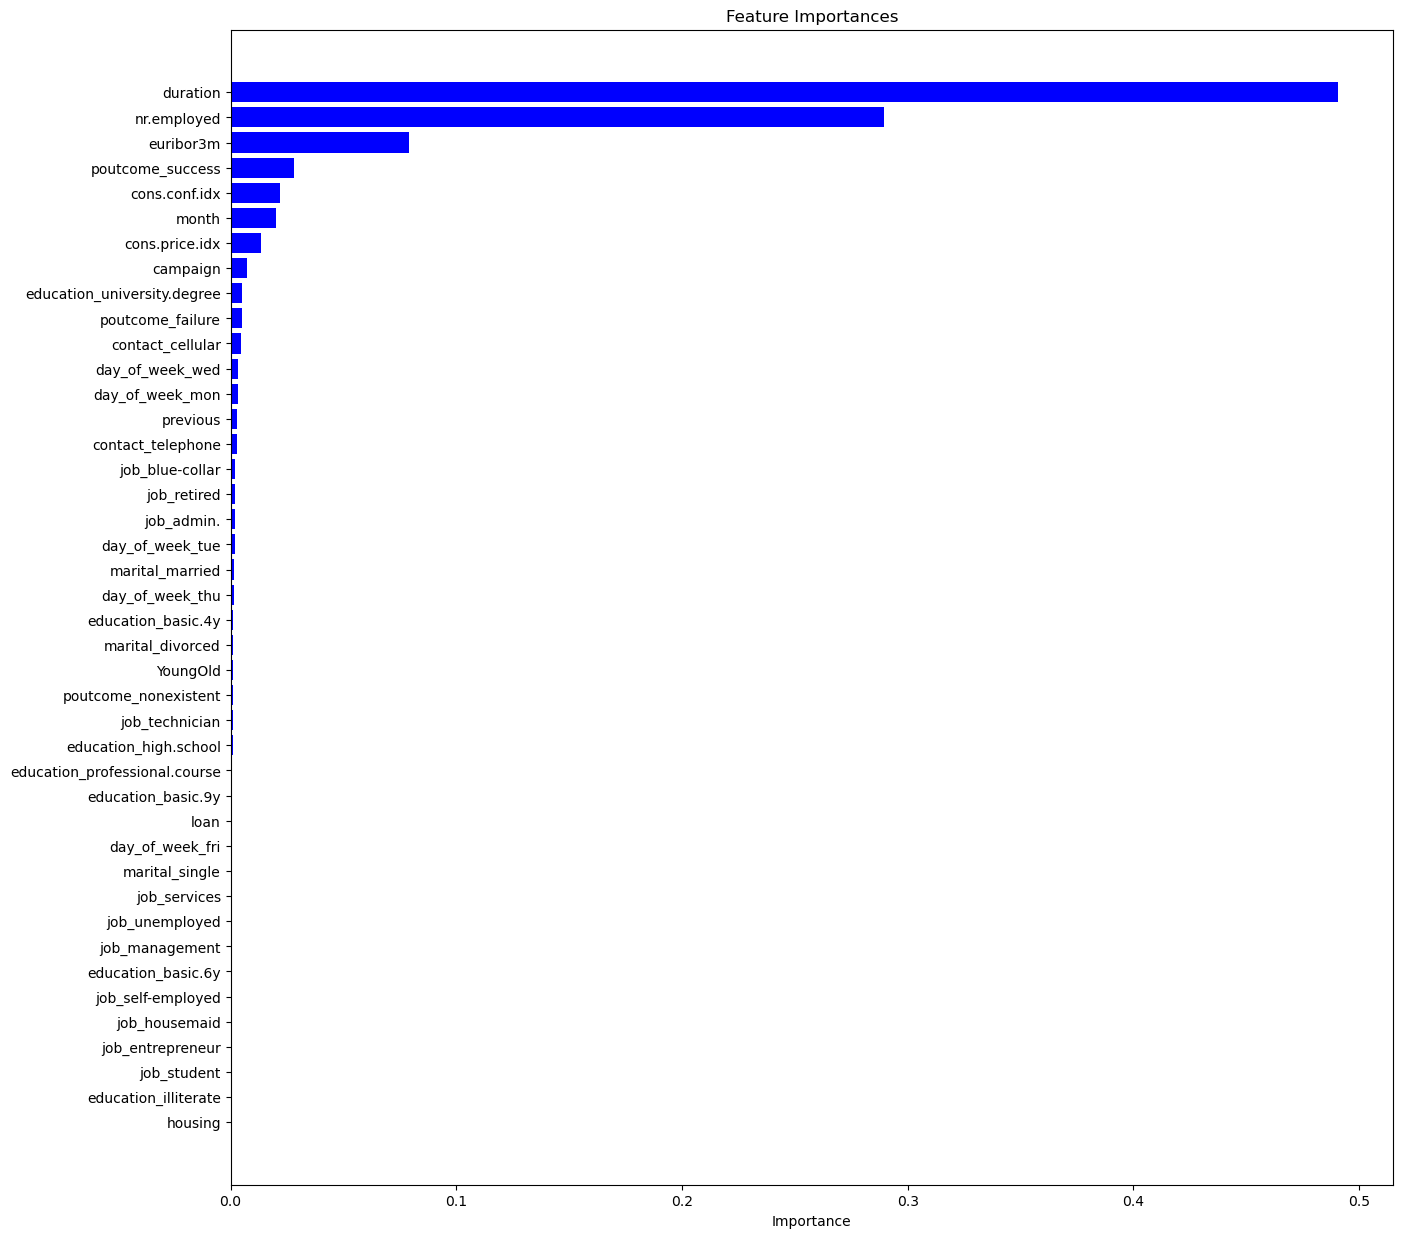

In [86]:
feature_importance = best_gboost.feature_importances_
features= X_train.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

<h1>EVALUATION</h1>

- Confusion Matrix
- Classification_report (Precision, Accuracy, Recall, F1 Score)
- ROC and AUC
<br>

<b>All the models to evaluate (not including the base models)</b>

- best_lr_model 
- best_knn_model
- best__tunedtree_mode
- best_posttree_model
- best_rf_model
- best_gboost

In [48]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression with regularization
best_lr_model = LogisticRegression(C = 0.3, penalty = 'l1', random_state = 42, solver = 'liblinear')

# KNN
best_knn_model = KNeighborsClassifier(n_neighbors=33, weights='uniform', p=2)

# Decision Trees
best__tunedtree_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_leaf_nodes= 20, min_samples_split= 2, random_state = 42)
best_posttree_model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=float(0.000161))

# Ensable Trees
best_rf_model = RandomForestClassifier(n_estimators = 330, min_samples_split = 10, min_samples_leaf = 10, max_features = 26, max_depth = 50, random_state = 42) 
best_gboost = GradientBoostingClassifier(n_estimators=20, learning_rate=0.2, max_depth=9, subsample =  0.9, min_samples_split = 2, max_leaf_nodes = 20, random_state=42)


# Saving all the models in a list and fit each one with a for loop:
models = [best_lr_model, best_knn_model, best__tunedtree_model, best_posttree_model, best_rf_model, best_gboost]

# Non-tree models:
for m in models[0:2]: 
    m.fit(X_train_standardized, y_train)

# Tree-based models
for m in models[2:]:
    m.fit(X_train, y_train)

In [49]:
# Function for building a metrics dataframe. We are considering precision, recall, specificity, f1 score, accuracy and AUC. 
# The final dataframe is saved as "results".

def get_metrics(cm, auc):
    TN = cm[0, 0]
    FN = cm[1, 0]
    FP = cm[0, 1]
    TP = cm[1, 1]
    
    #Precision
    precision = TP/(TP+FP)
    #Recall
    recall = TP/(TP+FN)
    #Specificity
    specificity = TN/(TN+FP)
    #F1-score
    f1_score = (2*precision*recall)/(precision+recall)
    #Accuracy
    accuracy = (TN+TP)/(TN+TP+FP+FN)
    
    # AUC
    auc = roc_auc
    
    # return all metrics
    return precision, recall, specificity, f1_score, accuracy, auc

In [50]:
# Empty results dataframe 

results = pd.DataFrame({
    'Precision': [],
    'Recall':[],
    'Specificity':[],
    'F1_score':[],
    'Accuracy':[],
    'AUC': []
})

<h3 style="color:green;">Dummy Classifier</h3>

[[6769    0]
 [ 878    0]]


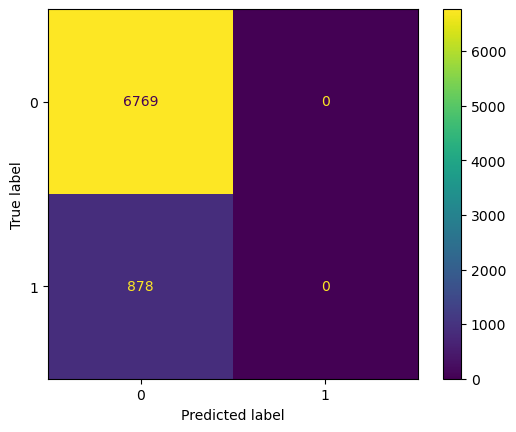

C:\Users\alida\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alida\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alida\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6769
           1       0.00      0.00      0.00       878

    accuracy                           0.89      7647
   macro avg       0.44      0.50      0.47      7647
weighted avg       0.78      0.89      0.83      7647



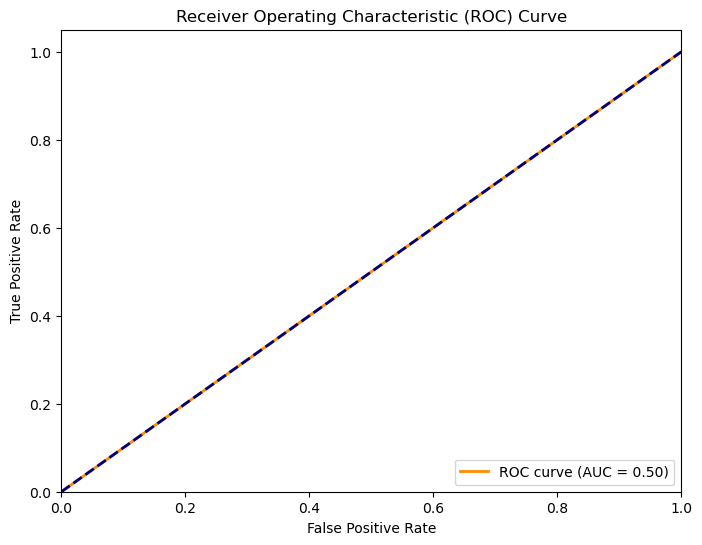

C:\Users\alida\AppData\Local\Temp\ipykernel_23604\2420221042.py:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP+FP)


In [51]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_standardized, y_train)

dummy_pred=dummy_clf.predict(X_test_standardized)
cm_dummy = confusion_matrix(y_test, dummy_pred)

# Print Confusion Matrix
print(cm_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dummy,
                               display_labels=dummy_clf.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, dummy_pred))

# ROC and AUC
y_prob_dummy = dummy_clf.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dummy)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Results for result dataframe
results.loc[len(results)] = get_metrics(cm_dummy,roc_auc)

<h3 style="color:green;">Logistic Regression and KNN</h3>

LogisticRegression(C=0.3, penalty='l1', random_state=42, solver='liblinear')
[[6595  174]
 [ 530  348]]


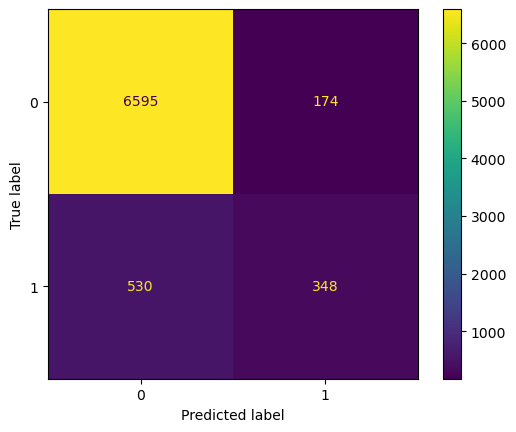

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6769
           1       0.67      0.40      0.50       878

    accuracy                           0.91      7647
   macro avg       0.80      0.69      0.72      7647
weighted avg       0.90      0.91      0.90      7647



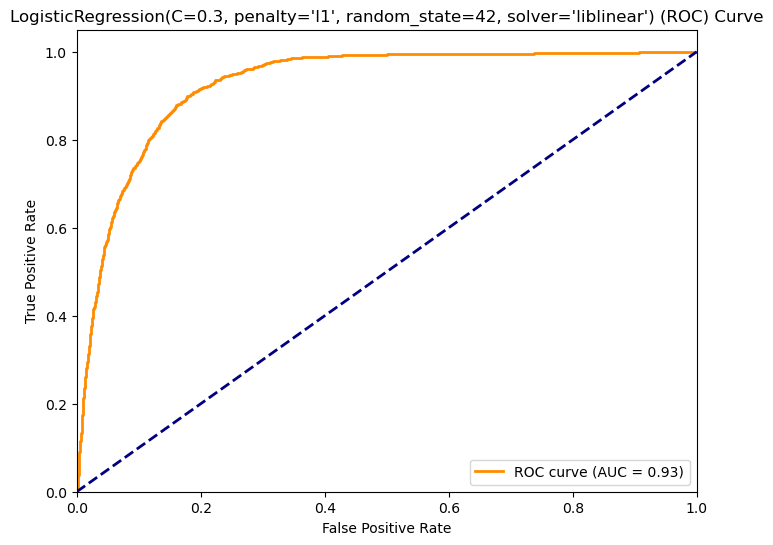

KNeighborsClassifier(n_neighbors=33)
[[6588  181]
 [ 562  316]]


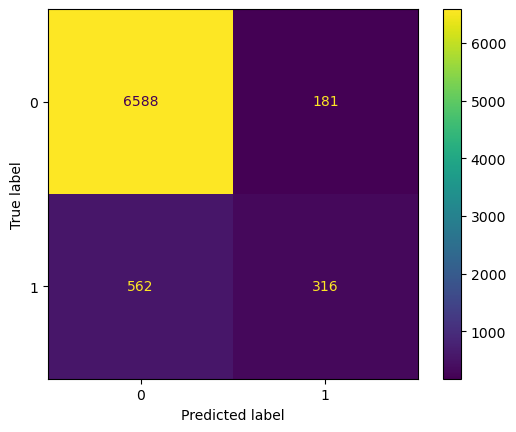

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6769
           1       0.64      0.36      0.46       878

    accuracy                           0.90      7647
   macro avg       0.78      0.67      0.70      7647
weighted avg       0.89      0.90      0.89      7647



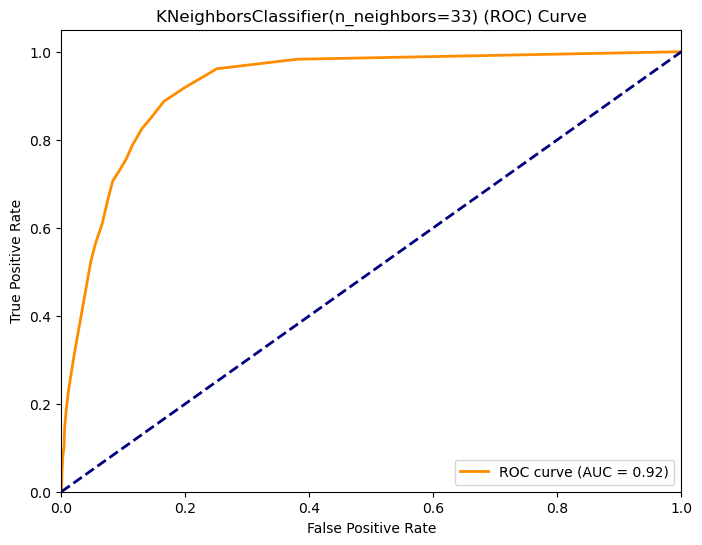

In [52]:
class color:
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   END = '\033[0m'


for m in models[0:2]: 
    pred =m.predict(X_test_standardized)
    cm = confusion_matrix(y_test, pred)

    # Print Confusion Matrix
    print(color.BOLD + color.GREEN + f'{m}' + color.END)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=m.classes_)
    disp.plot()
    plt.show()

    # Print Classification Report
    print(classification_report(y_test, pred))

    # ROC and AUC
    y_prob = m.predict_proba(X_test_standardized)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Results for result dataframe
    results.loc[len(results)] = get_metrics(cm,roc_auc)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{m} (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()   

<h3 style="color:green;">Tree-based Models</h3>

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=20, random_state=42)
[[6484  285]
 [ 389  489]]


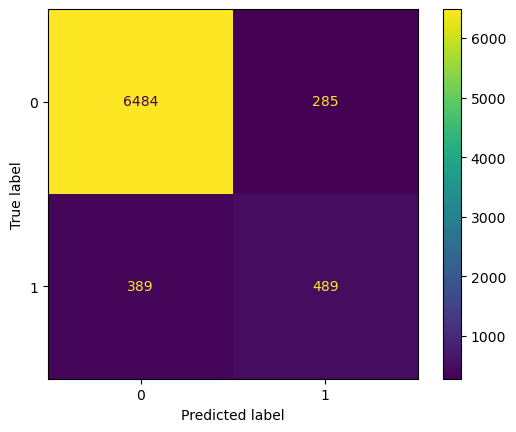

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.63      0.56      0.59       878

    accuracy                           0.91      7647
   macro avg       0.79      0.76      0.77      7647
weighted avg       0.91      0.91      0.91      7647



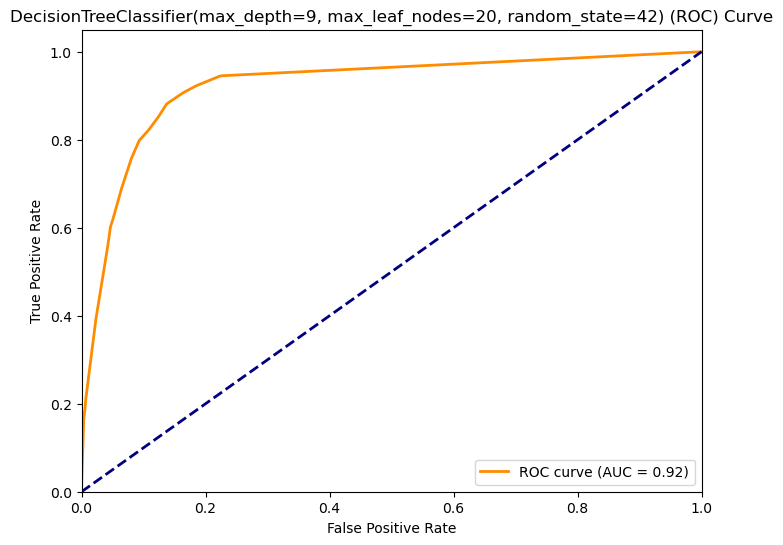

DecisionTreeClassifier(ccp_alpha=0.000161, random_state=42)
[[6523  246]
 [ 414  464]]


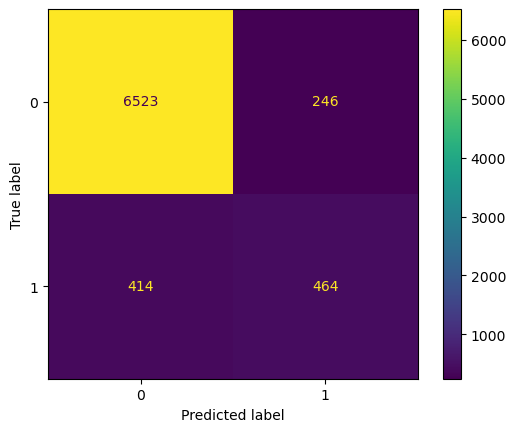

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.65      0.53      0.58       878

    accuracy                           0.91      7647
   macro avg       0.80      0.75      0.77      7647
weighted avg       0.91      0.91      0.91      7647



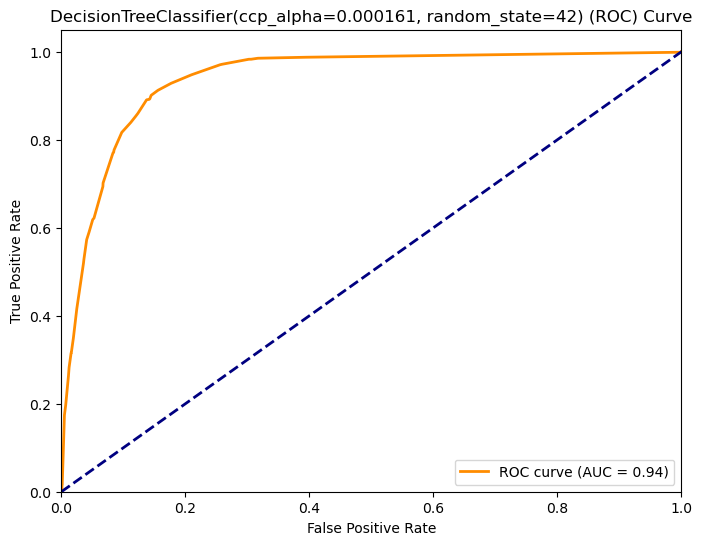

RandomForestClassifier(max_depth=50, max_features=26, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=330, random_state=42)
[[6515  254]
 [ 407  471]]


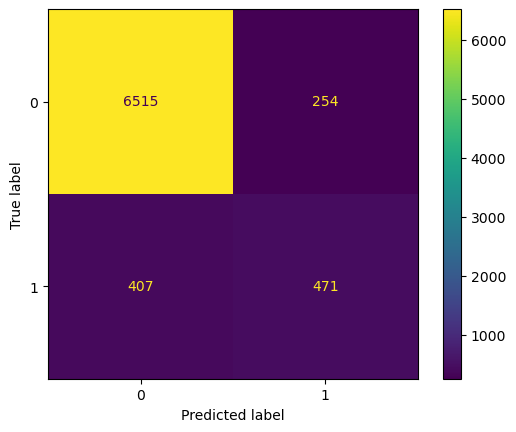

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.65      0.54      0.59       878

    accuracy                           0.91      7647
   macro avg       0.80      0.75      0.77      7647
weighted avg       0.91      0.91      0.91      7647



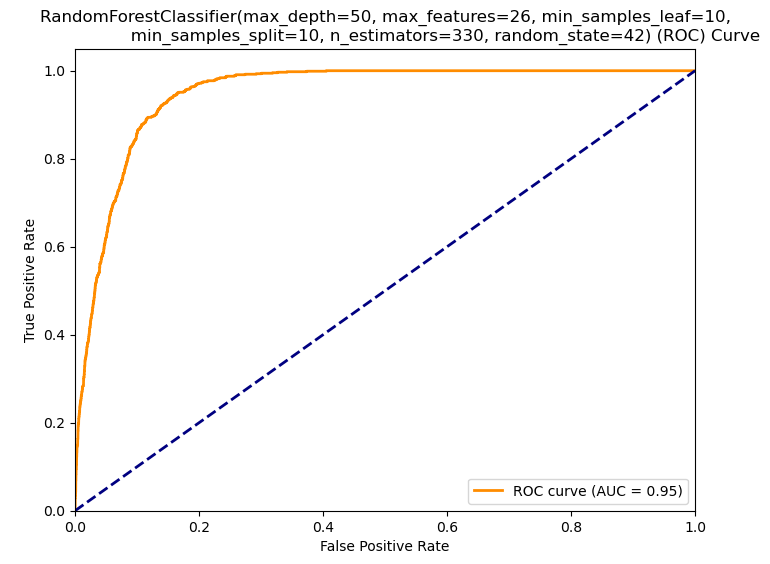

GradientBoostingClassifier(learning_rate=0.2, max_depth=9, max_leaf_nodes=20,
                           n_estimators=20, random_state=42, subsample=0.9)
[[6519  250]
 [ 402  476]]


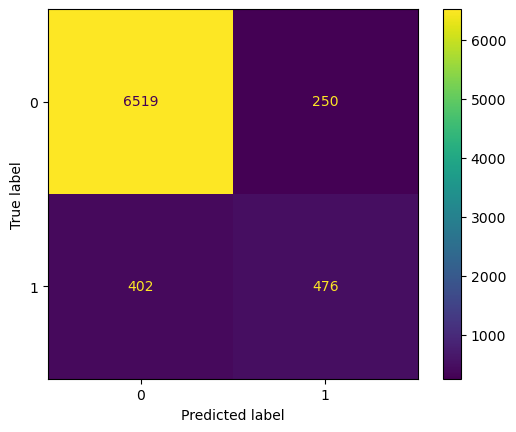

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.66      0.54      0.59       878

    accuracy                           0.91      7647
   macro avg       0.80      0.75      0.77      7647
weighted avg       0.91      0.91      0.91      7647



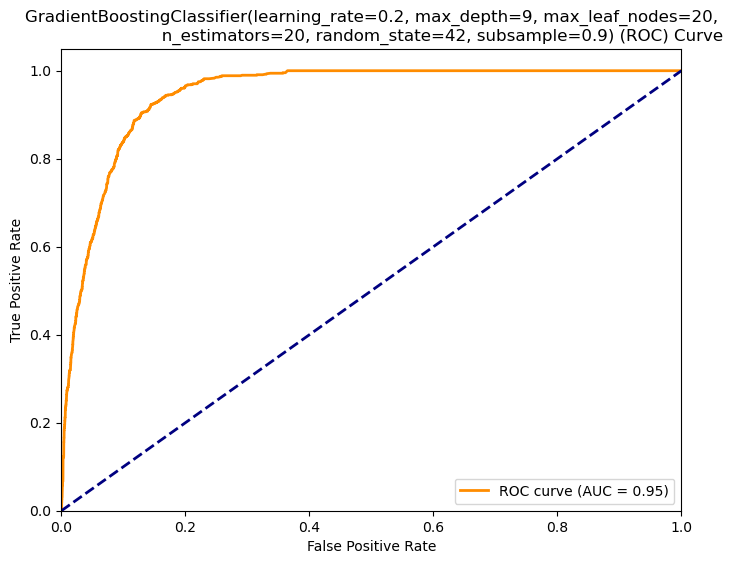

In [53]:
class color:
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   END = '\033[0m'


for m in models[2:]: 
    pred =m.predict(X_test)
    cm = confusion_matrix(y_test, pred)

    # Print Confusion Matrix
    print(color.BOLD + color.GREEN + f'{m}' + color.END)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=m.classes_)
    disp.plot()
    plt.show()

    # Print Classification Report
    print(classification_report(y_test, pred))

    # ROC and AUC
    y_prob = m.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Results for result dataframe
    results.loc[len(results)] = get_metrics(cm,roc_auc)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{m} (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [54]:
# Finally visualizing the results table, addign the row indexes with the name of the model

results.index = ['Dummy Model', 'Best Logistic Regression', 'Best KNN', 'Best Tuned Tree', 'Best Pruned Tree',
               'Best Random Forest', 'Best XGBoost']
results = results.round(3)
results

,Precision,Recall,Specificity,F1_score,Accuracy,AUC
Dummy Model,NaN,0.000,1.000,NaN,0.885,0.500
Best Logistic Regression,0.667,0.396,0.974,0.497,0.908,0.927
Best KNN,0.636,0.360,0.973,0.460,0.903,0.923
Best Tuned Tree,0.632,0.557,0.958,0.592,0.912,0.922
Best Pruned Tree,0.654,0.528,0.964,0.584,0.914,0.937
Best Random Forest,0.650,0.536,0.962,0.588,0.914,0.949
Best XGBoost,0.656,0.542,0.963,0.594,0.915,0.947


<h1>ETHICS and FAIRNESS</h1>

Sensitive features considered: YoungOld, marital, education, job.

 - demographic parity
 - equality of odds
 
Then
- mitigate unfairness


In [55]:
index = X_test.index
columns = X_test.columns

<h2 style="color:red;">Fairness Assessment: Age </h2>

In [56]:
# for fairness assessment
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, selection_rate, equalized_odds_difference, demographic_parity_difference, selection_rate

# for mitigation
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer

In [57]:
# create a MetricFrame to compute metrics across groups
pred = best_rf_model.predict(X_test)

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred= pred,
    sensitive_features=X_test['YoungOld'])

# Print the results
print(metrics.by_group)

          selection_rate       TPR       FPR
YoungOld                                    
0               0.089450  0.528830  0.036752
1               0.110157  0.553506  0.039813


In [58]:
# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test['YoungOld'])
print(f"Demographic Parity Difference: {dpd:.2f}")

Demographic Parity Difference: 0.02


In [59]:
# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test['YoungOld'])
print(f"Equalized Odds Difference: {eod:.2f}")

Equalized Odds Difference: 0.02


<h3 style="color:green;">Mitigating Unfairness</h3>

In [62]:
# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

postprocessor.fit(X_test, y_test,  sensitive_features=X_test['YoungOld'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test['YoungOld'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test['YoungOld'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test['YoungOld'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test['YoungOld'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

Best RF Model:
Equalized Odds Difference after Mitigation: 0.01
          selection_rate       TPR       FPR
YoungOld                                    
0                0.08398  0.509061  0.032997
1                0.09904  0.498155  0.035714
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6769
           1       0.66      0.50      0.57       878

    accuracy                           0.91      7647
   macro avg       0.80      0.73      0.76      7647
weighted avg       0.91      0.91      0.91      7647



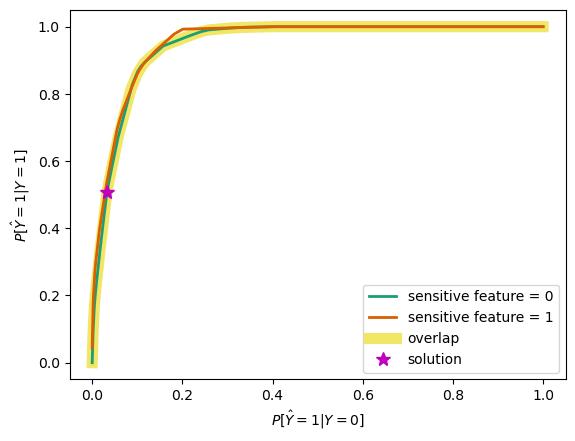

In [34]:
plot_threshold_optimizer(postprocessor, ax=None, show_plot=True)

<h2 style="color:red;">Fairness Assessment: Marital Status </h2>
marital_married X marital_single X marital_divorced

In [47]:
class color:
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   END = '\033[0m'

cl = ['marital_married', 'marital_single', 'marital_divorced']


for c in cl: 
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=pred,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Compute the demographic parity difference
    dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Demographic Parity Difference: {dpd:.2f}")

    # Compute the equalized odds difference
    eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Equalized Odds Difference: {eod:.2f}")

marital_married
                 selection_rate       TPR       FPR
marital_married                                    
0                      0.110892  0.557292  0.046547
1                      0.084149  0.520243  0.031669
Demographic Parity Difference: 0.03
Equalized Odds Difference: 0.04
marital_single
                selection_rate       TPR       FPR
marital_single                                    
0                     0.082789  0.518707  0.030691
1                     0.125760  0.572414  0.055706
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.05
marital_divorced
                  selection_rate       TPR       FPR
marital_divorced                                    
0                       0.097358  0.539541  0.039133
1                       0.075908  0.510638  0.025767
Demographic Parity Difference: 0.02
Equalized Odds Difference: 0.03


<h3 style="color:green;">Mitigating Unfairness</h3>

In [48]:
print("Best RF Model:")

for c in cl:
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    postprocessor.fit(X_test, y_test,  sensitive_features=X_test[c])

    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # re-assess the equality of odds
    eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test[c])
    print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

    # re-assess the metric frame
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Use the postprocessed model to make predictions on the test set
    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # Print the classification report
    print(classification_report(y_test, best_rf_model_y_pred_mitigated))


Best RF Model:
marital_married
Equalized Odds Difference after Mitigation: 0.01
                 selection_rate       TPR       FPR
marital_married                                    
0                      0.101706  0.528646  0.040165
1                      0.093499  0.536437  0.040195
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.64      0.54      0.58       878

    accuracy                           0.91      7647
   macro avg       0.79      0.75      0.77      7647
weighted avg       0.91      0.91      0.91      7647

marital_single
Equalized Odds Difference after Mitigation: 0.01
                selection_rate       TPR       FPR
marital_single                                    
0                     0.065541  0.408163  0.024593
1                     0.075269  0.400000  0.024337
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6769
        

<h2 style="color:red;">Fairness Assessment: Education </h2>
education_basic.4y X education_basic.6y X education_basic.9y X education_high.school X education_illiterate X education_professional.course X education_university.degree

In [60]:
cl = ['education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 
      'education_professional.course', 'education_university.degree']

for c in cl: 
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=pred,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Compute the demographic parity difference
    dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Demographic Parity Difference: {dpd:.2f}")

    # Compute the equalized odds difference
    eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Equalized Odds Difference: {eod:.2f}")

education_basic.4y
                    selection_rate       TPR       FPR
education_basic.4y                                    
0                         0.094691  0.531407  0.037506
1                         0.095855  0.585366  0.037681
Demographic Parity Difference: 0.00
Equalized Odds Difference: 0.05
education_basic.6y
                    selection_rate       TPR       FPR
education_basic.6y                                    
0                         0.097034  0.539739  0.038456
1                         0.057737  0.457143  0.022613
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.08
education_basic.9y
                    selection_rate       TPR       FPR
education_basic.9y                                    
0                         0.100323  0.542092  0.039825
1                         0.063269  0.489362  0.024904
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.05
education_high.school
                       selection_rate       TPR       FPR

<h3 style="color:green;">Mitigating Unfairness</h3>

In [63]:
for c in cl:
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    postprocessor.fit(X_test, y_test,  sensitive_features=X_test[c])

    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # re-assess the equality of odds
    eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test[c])
    print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

    # re-assess the metric frame
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Use the postprocessed model to make predictions on the test set
    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # Print the classification report
    print(classification_report(y_test, best_rf_model_y_pred_mitigated))

education_basic.4y
Equalized Odds Difference after Mitigation: 0.06
                    selection_rate       TPR       FPR
education_basic.4y                                    
0                         0.088145  0.508794  0.033065
1                         0.084197  0.573171  0.026087
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6769
           1       0.67      0.52      0.58       878

    accuracy                           0.92      7647
   macro avg       0.81      0.74      0.77      7647
weighted avg       0.91      0.92      0.91      7647

education_basic.6y
Equalized Odds Difference after Mitigation: 0.02
                    selection_rate       TPR       FPR
education_basic.6y                                    
0                         0.090796  0.520759  0.033904
1                         0.071594  0.542857  0.030151
              precision    recall  f1-score   support

           0       0.94      0.97      0.9

<h2 style="color:red;">Fairness Assessment: Job </h2>

job_admin. ? job_blue-collar job_entrepreneur job_housemaid job_management job_retired job_self-employed job_services job_student job_technician job_unemployed

In [108]:
cl = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 
'job_services', 'job_student', 'job_technician', 'job_unemployed']

for c in cl: 
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=pred,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Compute the demographic parity difference
    dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Demographic Parity Difference: {dpd:.2f}")

    # Compute the equalized odds difference
    eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Equalized Odds Difference: {eod:.2f}")


job_admin.
            selection_rate       TPR       FPR
job_admin.                                    
0                 0.088560  0.529316  0.034414
1                 0.112039  0.553030  0.046302
Demographic Parity Difference: 0.02
Equalized Odds Difference: 0.02
job_blue-collar
                 selection_rate       TPR       FPR
job_blue-collar                                    
0                      0.106582  0.545812  0.042321
1                      0.052378  0.473684  0.021332
Demographic Parity Difference: 0.05
Equalized Odds Difference: 0.07
job_entrepreneur
                  selection_rate       TPR       FPR
job_entrepreneur                                    
0                       0.095985  0.538012  0.038215
1                       0.060000  0.478261  0.017621
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.06
job_housemaid
               selection_rate     TPR       FPR
job_housemaid                                  
0                    0.094484  0.5

<h3 style="color:green;">Mitigating Unfairness</h3>

In [109]:
for c in cl:
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    postprocessor.fit(X_test, y_test,  sensitive_features=X_test[c])

    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # re-assess the equality of odds
    eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test[c])
    print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

    # re-assess the metric frame
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Use the postprocessed model to make predictions on the test set
    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # Print the classification report
    print(classification_report(y_test, best_rf_model_y_pred_mitigated))

job_admin.
Equalized Odds Difference after Mitigation: 0.00
            selection_rate       TPR       FPR
job_admin.                                    
0                 0.095331  0.535831  0.041216
1                 0.104668  0.534091  0.040655
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.62      0.52      0.57       878

    accuracy                           0.91      7647
   macro avg       0.78      0.74      0.76      7647
weighted avg       0.90      0.91      0.90      7647

job_blue-collar
Equalized Odds Difference after Mitigation: 0.01
                 selection_rate       TPR       FPR
job_blue-collar                                    
0                      0.099064  0.523560  0.036959
1                      0.067429  0.508772  0.034906
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.65      0.52      0.58